Running inference on image pairs
============================

If you want to use a pre-trained PWC-Net model on your own set of images, you can pass a list of image pairs to a `ModelPWCNet` object using its  `predict_from_img_pairs()` method, as demonstrated here.

Below, look for `TODO` references and customize this notebook based on your own needs.

In [1]:
"""
pwcnet_predict_from_img_pairs.ipynb

Run inference on a list of images pairs.

Written by Phil Ferriere

Licensed under the MIT License (see LICENSE for details)
"""
from __future__ import absolute_import, division, print_function
from copy import deepcopy
from skimage.io import imread
from model_pwcnet import ModelPWCNet, _DEFAULT_PWCNET_TEST_OPTIONS
from visualize import display_img_pairs_w_flows

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [2]:
import numpy as np

In [3]:
# TODO: Set device to use for inference
# Here, we're using a GPU (use '/device:CPU:0' to run inference on the CPU)
gpu_devices = ['/device:GPU:0']  
controller = '/device:GPU:0'

# TODO: Set the path to the trained model (make sure you've downloaded it first from http://bit.ly/tfoptflow)
ckpt_path = './models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000'

In [4]:
# Build a list of image pairs to process
img_pairs = []
# for pair in range(1, 4):
for pair in range(1, 3):
    image_path1 = f'./samples/mpisintel_test_clean_ambush_1_frame_00{pair:02d}.png'
    image_path2 = f'./samples/mpisintel_test_clean_ambush_1_frame_00{pair+1:02d}.png'
    image1, image2 = imread(image_path1), imread(image_path2)

#     image1_tmp = (image1[0:64, 0:64]).copy()
#     image2_tmp = (image2[0:64, 0:64]).copy()

    img_pairs.append((image1, image2))
#     img_pairs.append((image1_tmp, image2_tmp))
print(np.shape(img_pairs))

(2, 2, 436, 1024, 3)


In [5]:
# Configure the model for inference, starting with the default options
nn_opts = deepcopy(_DEFAULT_PWCNET_TEST_OPTIONS)
nn_opts['verbose'] = True
nn_opts['ckpt_path'] = ckpt_path
nn_opts['batch_size'] = 1
nn_opts['gpu_devices'] = gpu_devices
nn_opts['controller'] = controller

# We're running the PWC-Net-large model in quarter-resolution mode
# That is, with a 6 level pyramid, and upsampling of level 2 by 4 in each dimension as the final flow prediction
nn_opts['use_dense_cx'] = True
nn_opts['use_res_cx'] = True
nn_opts['pyr_lvls'] = 6
nn_opts['flow_pred_lvl'] = 2

# The size of the images in this dataset are not multiples of 64, while the model generates flows padded to multiples
# of 64. Hence, we need to crop the predicted flows to their original size
# nn_opts['adapt_info'] = (1, 436, 1024, 2)

NameError: name '_DEFAULT_PWCNET_TEST_OPTIONS' is not defined

In [6]:
# Instantiate the model in inference mode and display the model configuration
nn = ModelPWCNet(mode='test', options=nn_opts)
nn.print_config()

NameError: name 'ModelPWCNet' is not defined

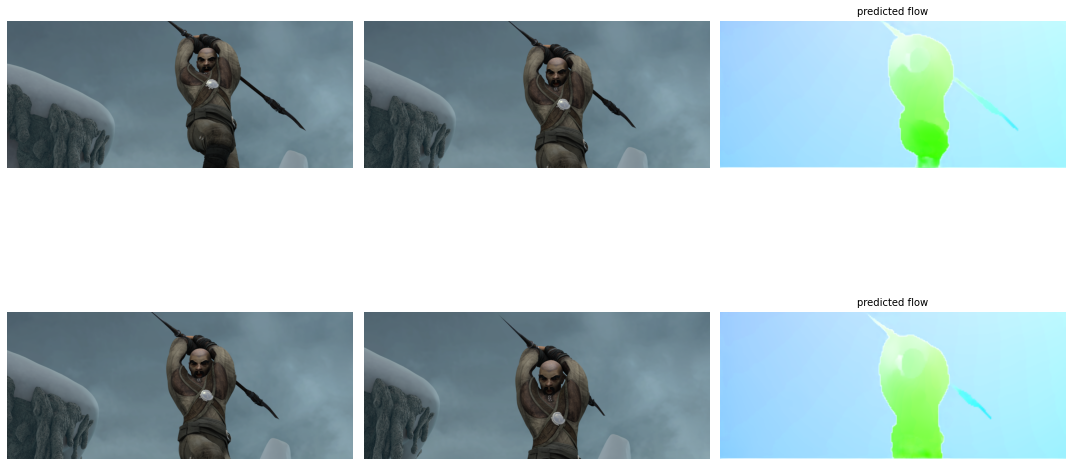

In [7]:
# Generate the predictions and display them
pred_labels = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
display_img_pairs_w_flows(img_pairs, pred_labels)

In [14]:
np.shape(pred_labels)

(2, 436, 1024, 2)

In [16]:
pred_labels[0][0][0:4]

array([[-45.985718, -26.169468],
       [-46.433666, -26.81728 ],
       [-46.881615, -27.46509 ],
       [-47.329563, -28.1129  ]], dtype=float32)

## load the model again

In [ ]:
# Configure the model for inference, starting with the default options
nn_opts = deepcopy(_DEFAULT_PWCNET_TEST_OPTIONS)
nn_opts['verbose'] = True
nn_opts['ckpt_path'] = ckpt_path
nn_opts['batch_size'] = 1
nn_opts['gpu_devices'] = gpu_devices
nn_opts['controller'] = controller

# We're running the PWC-Net-large model in quarter-resolution mode
# That is, with a 6 level pyramid, and upsampling of level 2 by 4 in each dimension as the final flow prediction
nn_opts['use_dense_cx'] = True
nn_opts['use_res_cx'] = True
nn_opts['pyr_lvls'] = 6
nn_opts['flow_pred_lvl'] = 2

# The size of the images in this dataset are not multiples of 64, while the model generates flows padded to multiples
# of 64. Hence, we need to crop the predicted flows to their original size
# nn_opts['adapt_info'] = (1, 436, 1024, 2)

In [ ]:
# Instantiate the model in inference mode and display the model configuration
nn = ModelPWCNet(mode='test', options=nn_opts)
nn.print_config()

# Load the video data

In [21]:
path='/home/gaofeng/Courses/209AS_AIoT/TimeAwareness/Data_withVideo/'

# load video from training set
Train_data = np.load(path + 'Data_train_all.npz')
Video_train = Train_data['arr_3']
print('Video_train', Video_train.shape)

# load video from test set
Test_data = np.load(path + 'Data_test_71.pkl',allow_pickle=True)
Video_test = Test_data[3]
print('Video_test', Video_test.shape)


Video_train (11976, 45, 64, 64, 3)
Video_test (1377, 45, 64, 64, 3)


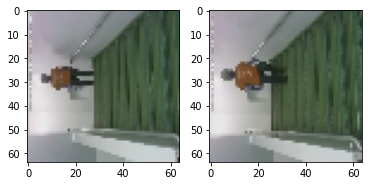

In [33]:
# video frame example
import matplotlib.pyplot as plt
img_id = 100
# first frame
plt.figure()
ax = plt.subplot(1, 2, 1)
plt.imshow(Video_train[img_id][0])
# last frame
ax = plt.subplot(1, 2, 2)
plt.imshow(Video_train[img_id][44])

## an example of flow of this data

In [47]:
# Build a list of image pairs to process
img_pairs = []
img_id = 0
for pair in range(0, 1):
    image1, image2 = Video_train[img_id][pair], Video_train[img_id][pair+1]
    img_pairs.append((image1, image2))
print(np.shape(img_pairs))

(1, 2, 64, 64, 3)


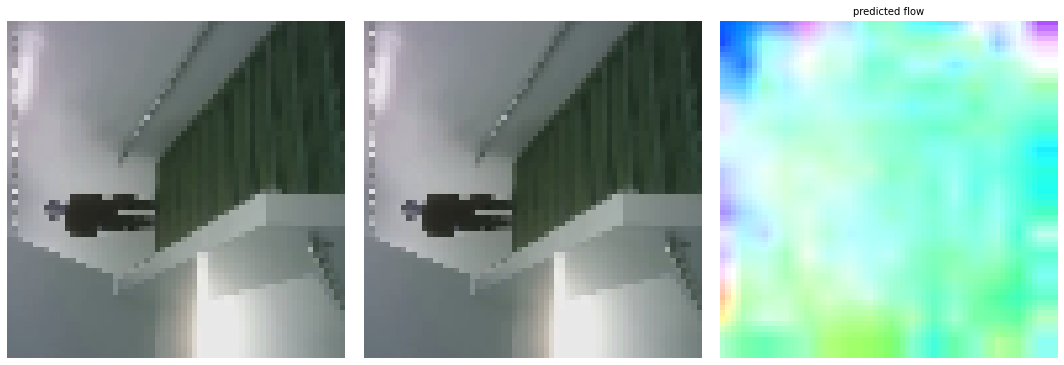

In [51]:
# Generate the predictions and display them
pred_labels = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
display_img_pairs_w_flows(img_pairs, pred_labels)

In [50]:
print(np.shape(pred_labels))
print('pred_labels:', 'min:', np.min(pred_labels), 'max:', np.max(pred_labels))

(1, 64, 64, 2)
pred_labels: min: -0.18382512 max: 0.12272098


In [54]:
# Build a list of image pairs to process
img_pairs = []
img_id = 0
for pair in range(0, 44):
    image1, image2 = Video_train[img_id][pair], Video_train[img_id][pair+1]
    img_pairs.append((image1, image2))
print('img_pairs', np.shape(img_pairs))
pred_labels = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
print('pred_labels', np.shape(pred_labels))
print('pred_labels:', 'min:', np.min(pred_labels), 'max:', np.max(pred_labels))

img_pairs (44, 2, 64, 64, 3)
pred_labels (44, 64, 64, 2)
pred_labels: min: -0.4291099 max: 0.35987732


# Compute the flows for video in Test dataset

In [63]:
!pip install tqdm

In [67]:
from tqdm import tqdm

In [84]:
Video_test.shape[0]

1377

In [85]:
# flows of test videos
pred_flows_all_video = []
for vid_id in tqdm(range(0, Video_test.shape[0])):
    img_pairs = []
    for img_id in range(0, 44):
        image1, image2 = Video_test[vid_id][img_id], Video_test[vid_id][img_id+1]
        img_pairs.append((image1, image2))
    pred_flows_one_video = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
    pred_flows_all_video.append(pred_flows_one_video)
print('pred_flows_all_video', np.shape(pred_flows_all_video))

100%|██████████| 1377/1377 [46:08<00:00,  2.01s/it]


pred_flows_all_video (1377, 44, 64, 64, 2)


In [86]:
import pickle
fileObject = open('flows_test_videos.pkl', 'wb')
pickle.dump(pred_flows_all_video, fileObject)
fileObject.close()


In [87]:
tmp = pickle.load(open('flows_test_videos.pkl', "rb"))
np.shape(tmp)

(1377, 44, 64, 64, 2)

## compute the 2d flow for each frame (average the flows)

In [88]:
# two flow values for one frame
flows_array = np.array(pred_flows_all_video)
flows_array = flows_array.transpose(0,1,4,2,3)
flows_array_sum = flows_array.sum(axis=(3,4))/(64*64)
print('flows_array_sum', flows_array_sum.shape)

fileObject = open('flows_2d_test_videos.pkl', 'wb')
pickle.dump(flows_array_sum, fileObject)
fileObject.close()

flows_array_sum (1377, 44, 2)


In [89]:
ls

augment.py
ckpt_mgr.py
core_costvol.py
core_warp.py
dataset_base.py
dataset_flyingchairs.py
dataset_flyingthings3d.py
dataset_kitti.py
dataset_mixer.py
dataset_mpisintel.py
dataset_prep.ipynb
flows_2d_test_videos.pkl
flows_test_videos.pkl
img/
logger.py
losses.py
lr.py
mixed_precision.py
model_base.py
model_pwcnet.py
models/
multi_gpus.py
optflow.py
pred_flows_all_video.pkl
pwcnet_eval_lg-6-2-cyclic-chairsthingsmix_flyingchairs.ipynb
pwcnet_eval_lg-6-2-cyclic-chairsthingsmix_mpisintelclean.ipynb
pwcnet_eval_lg-6-2-cyclic-chairsthingsmix_mpisintelfinal.ipynb
pwcnet_eval_lg-6-2-multisteps-chairsthingsmix_flyingchairs.ipynb
pwcnet_eval_lg-6-2-multisteps-chairsthingsmix_mpisintelclean.ipynb
pwcnet_eval_lg-6-2-multisteps-chairsthingsmix_mpisintelfinal.ipynb
pwcnet_eval_sm-6-2-cyclic-chairsthingsmix_flyingchairs.ipynb
pwcnet_eval_sm-6-2-cyclic-chairsthingsmix-fp16.ipynb
pwcnet_eval_sm-6-2-cyclic-chairsthingsmix_mpisintelclean.ipynb
pwcnet_eval_sm-6-2-cyclic-chairsthingsmix_mpisintelfinal.ipy

# Compute the flows for video in Training dataset

In [90]:
Video_train.shape[0]

11976

In [91]:
# flows of train videos
pred_flows_all_video = []
for vid_id in tqdm(range(0, Video_train.shape[0])):
    img_pairs = []
    for img_id in range(0, 44):
        image1, image2 = Video_train[vid_id][img_id], Video_train[vid_id][img_id+1]
        img_pairs.append((image1, image2))
    pred_flows_one_video = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
    pred_flows_all_video.append(pred_flows_one_video)
print('pred_flows_all_video', np.shape(pred_flows_all_video))

100%|██████████| 11976/11976 [6:49:21<00:00,  2.05s/it]  


pred_flows_all_video (11976, 44, 64, 64, 2)


In [92]:
import pickle
fileObject = open('flows_train_videos.pkl', 'wb')
pickle.dump(pred_flows_all_video, fileObject)
fileObject.close()


In [93]:
# two flow values for one frame
flows_array = np.array(pred_flows_all_video)
flows_array = flows_array.transpose(0,1,4,2,3)
flows_array_sum = flows_array.sum(axis=(3,4))/(64*64)
print('flows_array_sum', flows_array_sum.shape)

fileObject = open('flows_2d_train_videos.pkl', 'wb')
pickle.dump(flows_array_sum, fileObject)
fileObject.close()

flows_array_sum (11976, 44, 2)


In [97]:
ls flows_* -lh

-rw-rw-r-- 1 gaofeng gaofeng 474K Mar  8 06:36 flows_2d_test_videos.pkl
-rw-rw-r-- 1 gaofeng gaofeng 4.1M Mar  8 13:29 flows_2d_train_videos.pkl
-rw-rw-r-- 1 gaofeng gaofeng 1.9G Mar  8 06:36 flows_test_videos.pkl
-rw-rw-r-- 1 gaofeng gaofeng  17G Mar  8 13:28 flows_train_videos.pkl


In [98]:
print('flows_array_sum', flows_array_sum.shape)


flows_array_sum (11976, 44, 2)


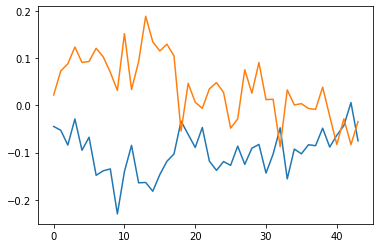

In [99]:
import matplotlib.pyplot as plt
plt.plot(flows_array_sum[2,:,0:2])